In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load Data
train_data = pd.read_csv('../DATA/data.csv')


In [4]:
train_data.head()

,ArticleId,Text,Category
0,14,One man's claims that he scammed people on the...,TECH
1,18,Maury Wills who helped the Los Angeles Dodgers...,SPORTS
2,21,For the past 18 months Hollywood has effective...,ENTERTAINMENT
3,22,President issues vow as tensions with China rise.,POLITICS
4,25,An annual celebration took on a different feel...,POLITICS


In [5]:
# Basic Data Exploration
print("NUMBER OF DATA POINTS -",train_data.shape[0])
print("NUMBER OF FEATURES -",train_data.shape[1])
print("FEATURES -",train_data.columns.values)

NUMBER OF DATA POINTS - 64351
NUMBER OF FEATURES - 3
FEATURES - ['ArticleId' 'Text' 'Category']


In [6]:
# Data Points per Category
train_data['Category'].value_counts()

POLITICS         34696
ENTERTAINMENT    16953
BUSINESS          5753
SPORTS            4933
TECH              1958
Name: Category, dtype: int64

In [7]:
# Data Cleaning. Removing rows with missing values
train_data.dropna(inplace=True)
train_data.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [8]:
target_category = train_data['Category'].unique()
print(target_category)

['TECH' 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'BUSINESS']


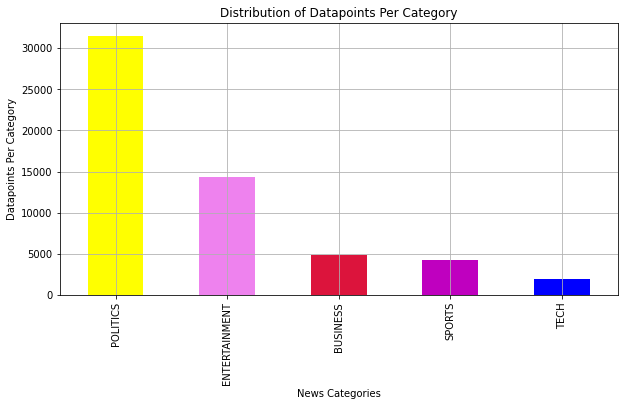

In [9]:
# Plotting data points per category
news_cat = train_data['Category'].value_counts()

plt.figure(figsize=(10,5))
my_colors = ['yellow','violet','crimson','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

# Loading stopwords from nltk library
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        # Replace every special character with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        # Remove multiple spaces
        total_text = re.sub('\s+',' ', total_text)
        
        # Converting to lowercase
        total_text = total_text.lower()
        
        for word in total_text.split():
        # If word is not a stopword then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [11]:
# Preprocessing the data

for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', train_data)
    else:
        print("THIS INDEX SHOULD NOT OCCUR :",index)

train_data.head()

,ArticleId,Text,Category
0,14,one man claims scammed people platform caused ...,TECH
1,18,maury wills helped los angeles dodgers win thr...,SPORTS
2,21,past 18 months hollywood effectively boycotted...,ENTERTAINMENT
3,22,president issues vow tensions china rise,POLITICS
4,25,annual celebration took different feel russia ...,POLITICS


In [12]:
# Dividing the data into train and test set
from sklearn.model_selection import train_test_split
X_train = train_data
y_train = train_data['Category']

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 45578
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 11395


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train['Text'])

# Getting all the feature names
train_text_features = text_vectorizer.get_feature_names()

#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

#zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total Number of Unique Words in Train Data :",len(train_text_features))

Total Number of Unique Words in Train Data : 15103
